# Dijkstra "Shortest Path" Algorithm

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Test Graphs and its Excepected Results

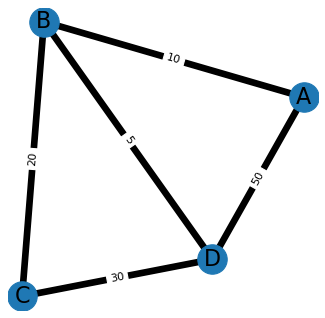

In [2]:
graph1 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 5 },
    'C' : { 'B' : 20 , 'D' : 30 },
    'D' : { 'A' : 50 , 'B' : 5, 'C' : 30 }
}


G = nx.Graph()
plt.figure(figsize=(5, 5), dpi=80)

G.add_edge("A", "B", weight=10)
G.add_edge("A", "D", weight=50)
G.add_edge("B", "D", weight=5)
G.add_edge("B", "C", weight=20)
G.add_edge("C", "D", weight=30)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis("off")

plt.show()

In [3]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

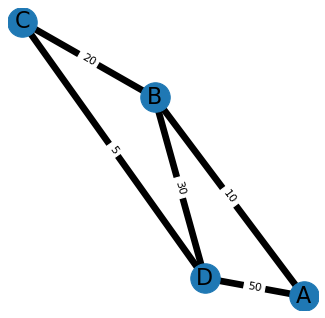

In [4]:
graph2 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 30 },
    'C' : { 'B' : 20 , 'D' : 5 },
    'D' : { 'A' : 50 , 'B' : 30, 'C' : 5 }
}

G = nx.Graph()
plt.figure(figsize=(5, 5), dpi=80)

G.add_edge("A", "B", weight=10)
G.add_edge("A", "D", weight=50)
G.add_edge("B", "D", weight=30)
G.add_edge("B", "C", weight=20)
G.add_edge("C", "D", weight=5)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis("off")

plt.show()

In [5]:
#Excepected Result
['A', 'B', 'C', 'D']

['A', 'B', 'C', 'D']

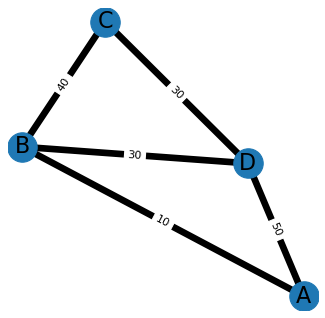

In [6]:
graph3 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 40, 'D' : 30 },
    'C' : { 'B' : 40 , 'D' : 30 },
    'D' : { 'A' : 50 , 'B' : 30, 'C' : 30 }
}


G = nx.Graph()
plt.figure(figsize=(5, 5), dpi=80)

G.add_edge("A", "B", weight=10)
G.add_edge("A", "D", weight=50)
G.add_edge("B", "D", weight=30)
G.add_edge("B", "C", weight=40)
G.add_edge("C", "D", weight=30)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.axis("off")

plt.show()

In [7]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

### First Algorithm
#### The shortest path according to the greedy approach

In [8]:
def Dij(graph, start, end):
    
    #Check the start and end vetices
    if start not in graph:
        print("Error!\nStart point not found!")
    
    if end not in graph:
        print("Error!\nEnd point not found!")
    
    
    
    values = {}                  # for updating values in each step
    visited = [start]            # to not visit it again and be in an infinite loop
    shortest_path = [start]      # The Desired Shortest Path
    
    for k in graph:
        if k != start:
            values[k] = float('inf')
            
    current_value = 0

    while shortest_path[-1] != end:
        for k, v in graph[shortest_path[-1]].items():
            if k not in shortest_path:
                if v + current_value < values[k]:
                    values[k] = v + current_value

        val = []
        key = []

        for k, v in values.items():
            key.append(k)
            val.append(v)

        target = list(zip(val, key))
        target.sort()
        
        for v,k in target:
            if k not in shortest_path:
                shortest_path.append(k)
                current_value += values[k] 
                break
        
    return shortest_path

#### Test 1

In [9]:
graph1 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 5 },
    'C' : { 'B' : 20 , 'D' : 30 },
    'D' : { 'A' : 50 , 'B' : 5, 'C' : 30 }
}

In [10]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

In [11]:
#Function Result
Dij(graph1, 'A', 'D')

['A', 'B', 'D']

#### Test 2

In [12]:
graph2 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 30 },
    'C' : { 'B' : 20 , 'D' : 5 },
    'D' : { 'A' : 50 , 'B' : 30, 'C' : 5 }
}

In [13]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

In [14]:
#Function Result
Dij(graph2, 'A', 'D')

['A', 'B', 'C', 'D']

### Second One
### This code depends on The whole shortest path
### Whole Shortest Path

In [15]:
def Dij2(graph, start, end):
    
    if start not in graph:
        print("Error!\nStart point not found!")
    
    if end not in graph:
        print("Error!\nEnd point not found!")
    
    
    values = {}
    # The Desired Shortest Path
    path = [start]
    
    for k in graph:
        if k != start:
            values[k] = [float('inf'), [start]]
    values[start] = [float('inf'), []]
    
    
    current_value = 0
    step = 1
    
    while path[-1] != end:
        
        current_node = path[-1]
        
        if step ==1 :
            for k, v in graph[current_node].items():
                if k not in path:
                    if v + current_value < values[k][0]:
                        values[k][0] = v + current_value
        
        else:
            
            last_node = path[-2]

            for k, v in graph[current_node].items():
                if k not in path:
                    if v + current_value < values[k][0]:
                        values[k][0] = v + current_value
                        values[k][1].append(current_node)
                    

        val = []
        key = []

        for k, v in values.items():
            if k != start:
                key.append(k)
                val.append(v[0])

        target = list(zip(val, key))
        target.sort()
        
        for v,k in target:
            if k not in path:
                path.append(k)
                current_value += graph[current_node][k] 
                break
        
        step += 1
     
    shortest_path = values[end][1] + [end]
    return shortest_path

#### Test 1

In [16]:
graph1 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 5 },
    'C' : { 'B' : 20 , 'D' : 30 },
    'D' : { 'A' : 50 , 'B' : 5, 'C' : 30 }
}

In [17]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

In [18]:
#Function Result
Dij2(graph1, 'A', 'D')

['A', 'B', 'D']

#### Test 2

In [19]:
graph2 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 20, 'D' : 30 },
    'C' : { 'B' : 20 , 'D' : 5 },
    'D' : { 'A' : 50 , 'B' : 30, 'C' : 5 }
}

In [20]:
#Excepected Result
['A', 'B', 'C', 'D']

['A', 'B', 'C', 'D']

In [21]:
#Function Result
Dij2(graph2, 'A', 'D')

['A', 'B', 'C', 'D']

#### Test 3

In [22]:
graph3 = {
    'A' : { 'B' : 10 , 'D' : 50 },
    'B' : { 'A' : 10 , 'C' : 40, 'D' : 30 },
    'C' : { 'B' : 40 , 'D' : 30 },
    'D' : { 'A' : 50 , 'B' : 30, 'C' : 30 }
    }

In [23]:
#Excepected Result
['A', 'B', 'D']

['A', 'B', 'D']

In [24]:
#Function Result
Dij2(graph3, 'A', 'D')

['A', 'B', 'D']